# Domain Information

In [111]:
# Domain Knowledge Information
# - The dataset is related to the BharatNet Project, a flagship initiative by the Government of India to provide high-speed broadband connectivity to rural areas.
# - The project primarily focuses on connecting Gram Panchayats (GPs), which are the smallest self-governing rural administrative units in India.
# - The initiative aims to bridge the digital divide between rural and urban areas, promoting digital inclusion.
# - BharatNet is implemented in multiple phases, with a focus on fiber-optic connectivity.
# - The project plays a crucial role in enhancing e-governance, online education, telemedicine, and financial inclusion in rural regions.
#
# The dataset includes key indicators such as:
# - Total Gram Panchayats: The total number of rural administrative bodies in each state.
# - Service Ready Gram Panchayats: The number of Panchayats that have been made broadband-ready under BharatNet.
# - Percentage of Service Ready Panchayats: A derived metric indicating the proportion of Panchayats with broadband access.
# - State-wise Distribution: Helps in identifying disparities in digital infrastructure development.
#
# Significance of Analysis:
# - Helps policymakers assess the progress of broadband connectivity across different states.
# - Identifies states lagging in broadband deployment, enabling better allocation of resources.
# - Supports data-driven decision-making for digital infrastructure improvements in rural areas.
# - Facilitates impact assessment of digital connectivity on socio-economic development.
# - Enables targeted interventions to accelerate broadband penetration in underserved regions.


# Load Dataset


In [22]:
file_path = "BharatnetServiceReady.csv"  # Update with your file path if needed
df = pd.read_csv(file_path)
df

,State,District,Total Gram Panchayats,Service Ready Gram Panchayats
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,8,7
1,ANDAMAN AND NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,37,37
2,ANDAMAN AND NICOBAR ISLANDS,SOUTH ANDAMANS,30,30
3,ANDHRA PRADESH,ANANTAPUR,1044,996
4,ANDHRA PRADESH,CHITTOOR,1412,1193
...,...,...,...,...
711,WEST BENGAL,NADIA,185,185
712,WEST BENGAL,PASCHIM BARDHAMAN,62,56
713,WEST BENGAL,PURBA BARDHAMAN,215,116
714,WEST BENGAL,PURULIA,170,170


In [23]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                        State                   District  \
0  ANDAMAN AND NICOBAR ISLANDS                  NICOBARS   
1  ANDAMAN AND NICOBAR ISLANDS  NORTH AND MIDDLE ANDAMAN   
2  ANDAMAN AND NICOBAR ISLANDS            SOUTH ANDAMANS   
3               ANDHRA PRADESH                 ANANTAPUR   
4               ANDHRA PRADESH                  CHITTOOR   

   Total Gram Panchayats  Service Ready Gram Panchayats  
0                      8                              7  
1                     37                             37  
2                     30                             30  
3                   1044                            996  
4                   1412                           1193  


# First 5 Rows

In [25]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State                          716 non-null    object
 1   District                       715 non-null    object
 2   Total Gram Panchayats          716 non-null    int64 
 3   Service Ready Gram Panchayats  716 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 22.5+ KB


# Dataset Info

In [27]:
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
       Total Gram Panchayats  Service Ready Gram Panchayats
count             716.000000                     716.000000
mean              733.224860                     581.282123
std              9801.000591                    7771.168594
min                 2.000000                       0.000000
25%               132.000000                      78.750000
50%               278.500000                     226.000000
75%               493.250000                     398.000000
max            262489.000000                  208099.000000


# Missing Values

In [29]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
State                            0
District                         1
Total Gram Panchayats            0
Service Ready Gram Panchayats    0
dtype: int64


# Remove missing values

In [31]:
df_cleaned = df.dropna()  

# Remove duplicates

In [33]:
duplicates = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df_cleaned = df_cleaned.drop_duplicates()


Number of duplicate rows: 0


# Rename columns to remove extra spaces

In [35]:
df_cleaned.columns = df_cleaned.columns.str.strip()

# Convert numeric columns

In [37]:
df_cleaned["Total Gram Panchayats"] = pd.to_numeric(df_cleaned["Total Gram Panchayats"], errors="coerce")
df_cleaned["Service Ready Gram Panchayats"] = pd.to_numeric(df_cleaned["Service Ready Gram Panchayats"], errors="coerce")
df_cleaned = df_cleaned.dropna(subset=["Total Gram Panchayats", "Service Ready Gram Panchayats"])


# Statistical Analysis

# T-Test: Compare means of Total vs. Service Ready Panchayats

In [40]:
t_stat, t_p_value = stats.ttest_ind(df_cleaned["Total Gram Panchayats"], df_cleaned["Service Ready Gram Panchayats"], equal_var=False)
print(f"T-Test Results:\nT-Statistic: {t_stat}\nP-Value: {t_p_value}")


T-Test Results:
T-Statistic: 4.833698298707401
P-Value: 1.486994457089451e-06


# F-Test: Compare variances (Levene’s test)

In [42]:
f_stat, f_p_value = stats.levene(df_cleaned["Total Gram Panchayats"], df_cleaned["Service Ready Gram Panchayats"])
print(f"\nF-Test Results:\nF-Statistic: {f_stat}\nP-Value: {f_p_value}")



F-Test Results:
F-Statistic: 5.751435038680521
P-Value: 0.01660286747125868


In [43]:
state1 = "Uttar Pradesh"
state2 = "Maharashtra"

In [44]:
data1 = df_cleaned[df_cleaned["State"] == state1]["Service Ready Gram Panchayats"].dropna()
data2 = df_cleaned[df_cleaned["State"] == state2]["Service Ready Gram Panchayats"].dropna()


In [45]:
if len(data1) > 1 and len(data2) > 1:
    t_stat_state, t_p_value_state = stats.ttest_ind(data1, data2, equal_var=False)
    print(f"\nT-Test between {state1} and {state2} (Service Ready Panchayats):\nT-Statistic: {t_stat_state}\nP-Value: {t_p_value_state}")
else:
    print(f"\nNot enough data for {state1} or {state2} to perform a T-Test.")



Not enough data for Uttar Pradesh or Maharashtra to perform a T-Test.


In [46]:
if len(data1) > 1 and len(data2) > 1:
    f_stat_state, f_p_value_state = stats.levene(data1, data2, center='mean')
    print(f"\nF-Test between {state1} and {state2} (Total Panchayats):\nF-Statistic: {f_stat_state}\nP-Value: {f_p_value_state}")
else:
    print(f"\nNot enough data for {state1} or {state2} to perform an F-Test.")



Not enough data for Uttar Pradesh or Maharashtra to perform an F-Test.


In [47]:
top_states = df_cleaned.groupby("State")["Total Gram Panchayats"].sum().nlargest(10).index
top_data = df_cleaned[df_cleaned["State"].isin(top_states)]
t_stat_top, t_p_value_top = stats.ttest_ind(top_data["Total Gram Panchayats"], top_data["Service Ready Gram Panchayats"], equal_var=False)
print(f"\nT-Test for Top 10 States (Total vs. Service Ready Panchayats):\nT-Statistic: {t_stat_top}\nP-Value: {t_p_value_top}")



T-Test for Top 10 States (Total vs. Service Ready Panchayats):
T-Statistic: 4.038995611187787
P-Value: 6.0146457791206523e-05


# Histogram of Total Gram Panchayats

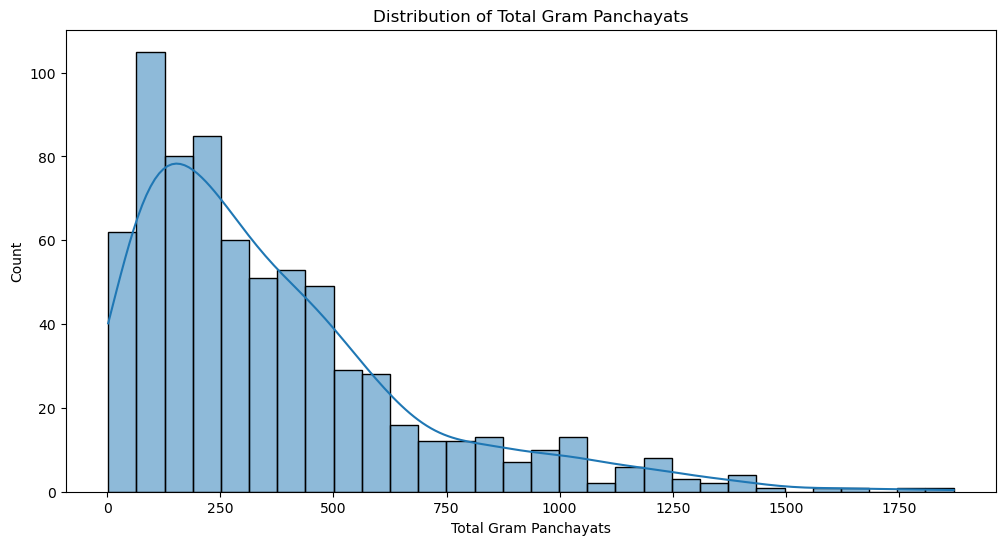

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned["Total Gram Panchayats"], bins=30, kde=True)
plt.title("Distribution of Total Gram Panchayats")
plt.show()

# Histogram of Service Ready Gram Panchayats

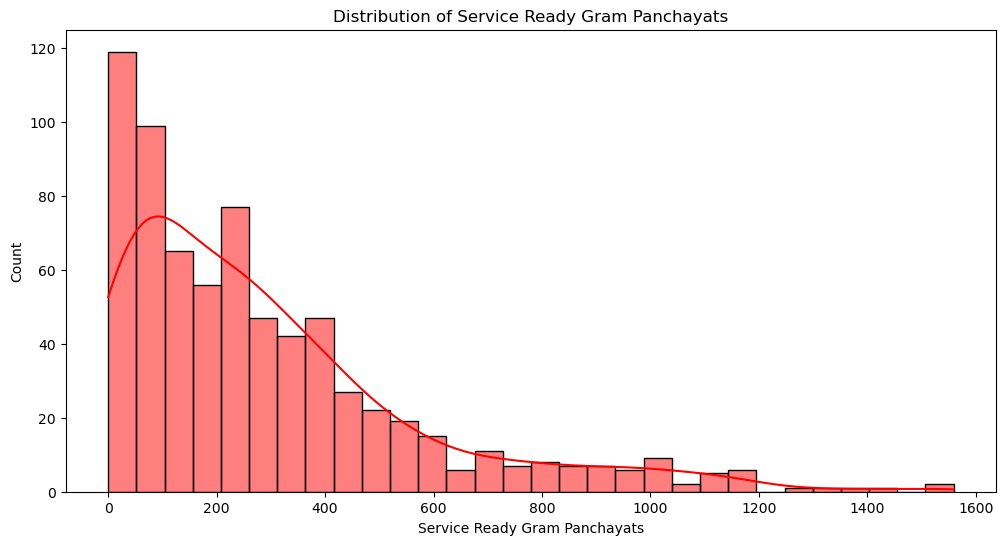

In [51]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned["Service Ready Gram Panchayats"], bins=30, kde=True, color='red')
plt.title("Distribution of Service Ready Gram Panchayats")
plt.show()

# Boxplot of Total Gram Panchayats

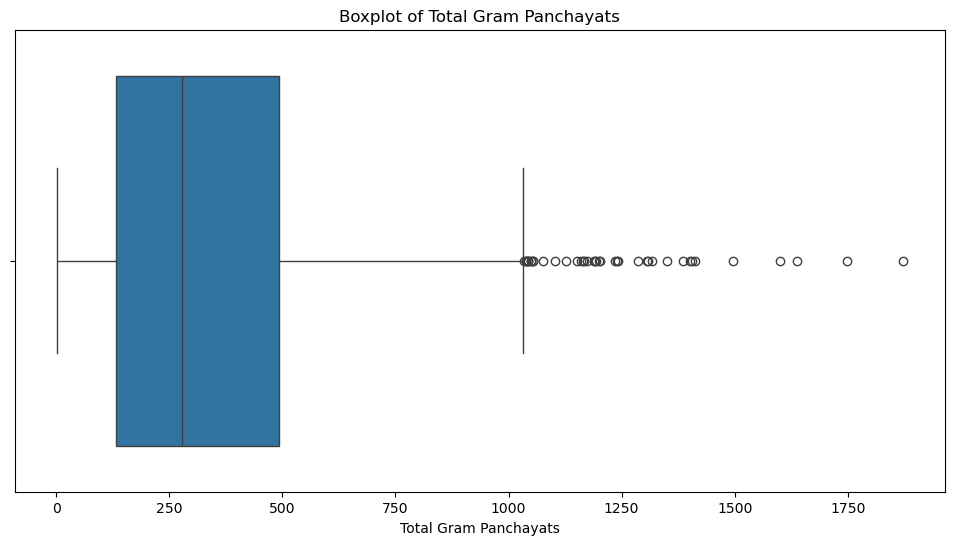

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned["Total Gram Panchayats"])
plt.title("Boxplot of Total Gram Panchayats")
plt.show()


# Boxplot of Service Ready Gram Panchayats

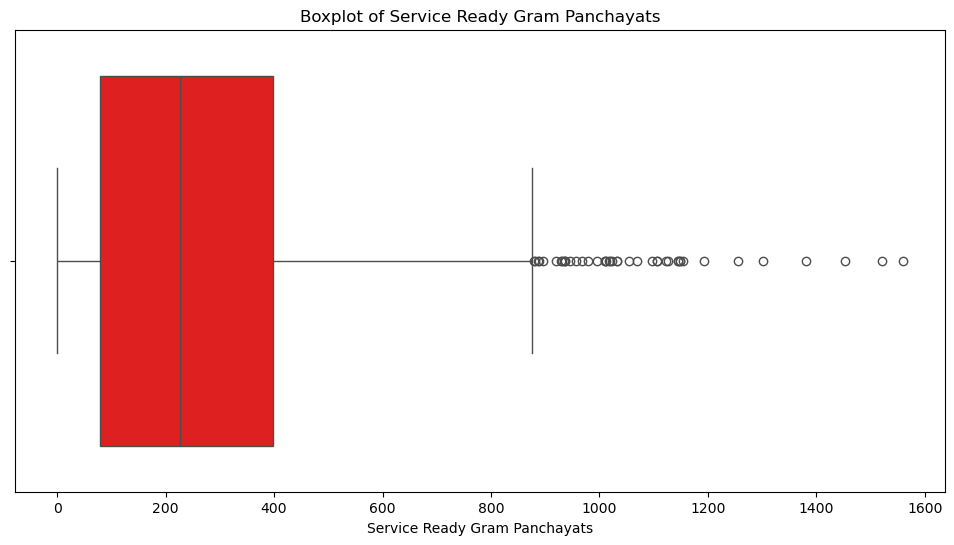

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned["Service Ready Gram Panchayats"], color='red')
plt.title("Boxplot of Service Ready Gram Panchayats")
plt.show()

# Scatterplot of Total vs Service Ready Panchayats

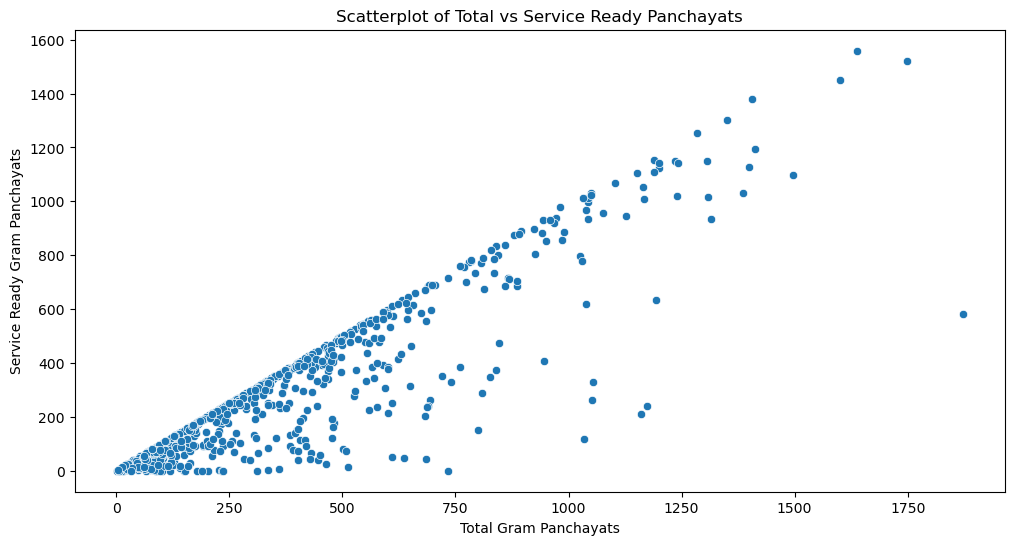

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_cleaned["Total Gram Panchayats"], y=df_cleaned["Service Ready Gram Panchayats"])
plt.title("Scatterplot of Total vs Service Ready Panchayats")
plt.show()


# Barplot of Total Gram Panchayats per State

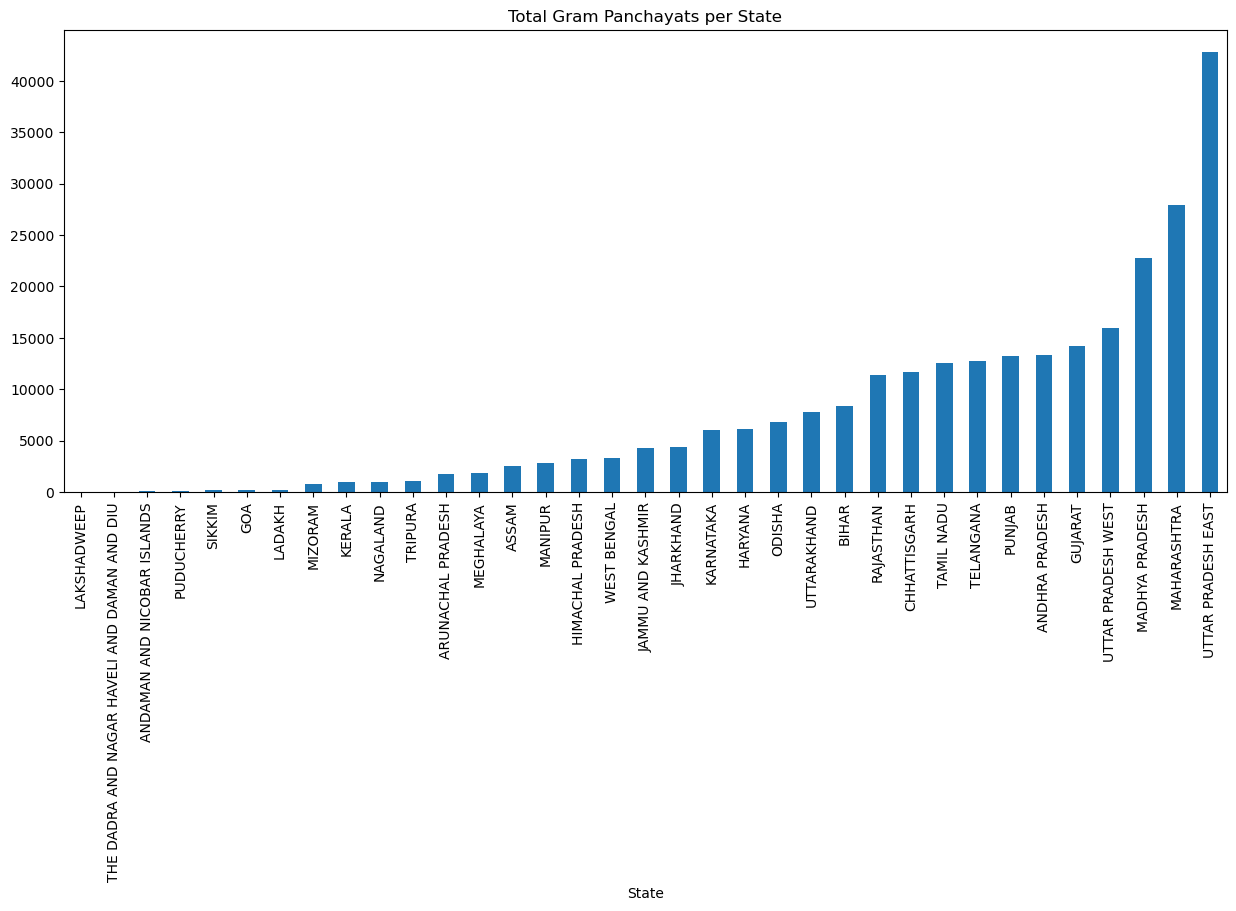

In [59]:
plt.figure(figsize=(12, 6))
df_cleaned.groupby("State")["Total Gram Panchayats"].sum().sort_values().plot(kind='bar', figsize=(15, 6))
plt.title("Total Gram Panchayats per State")
plt.xticks(rotation=90)
plt.show()

# Barplot of Service Ready Gram Panchayats per State

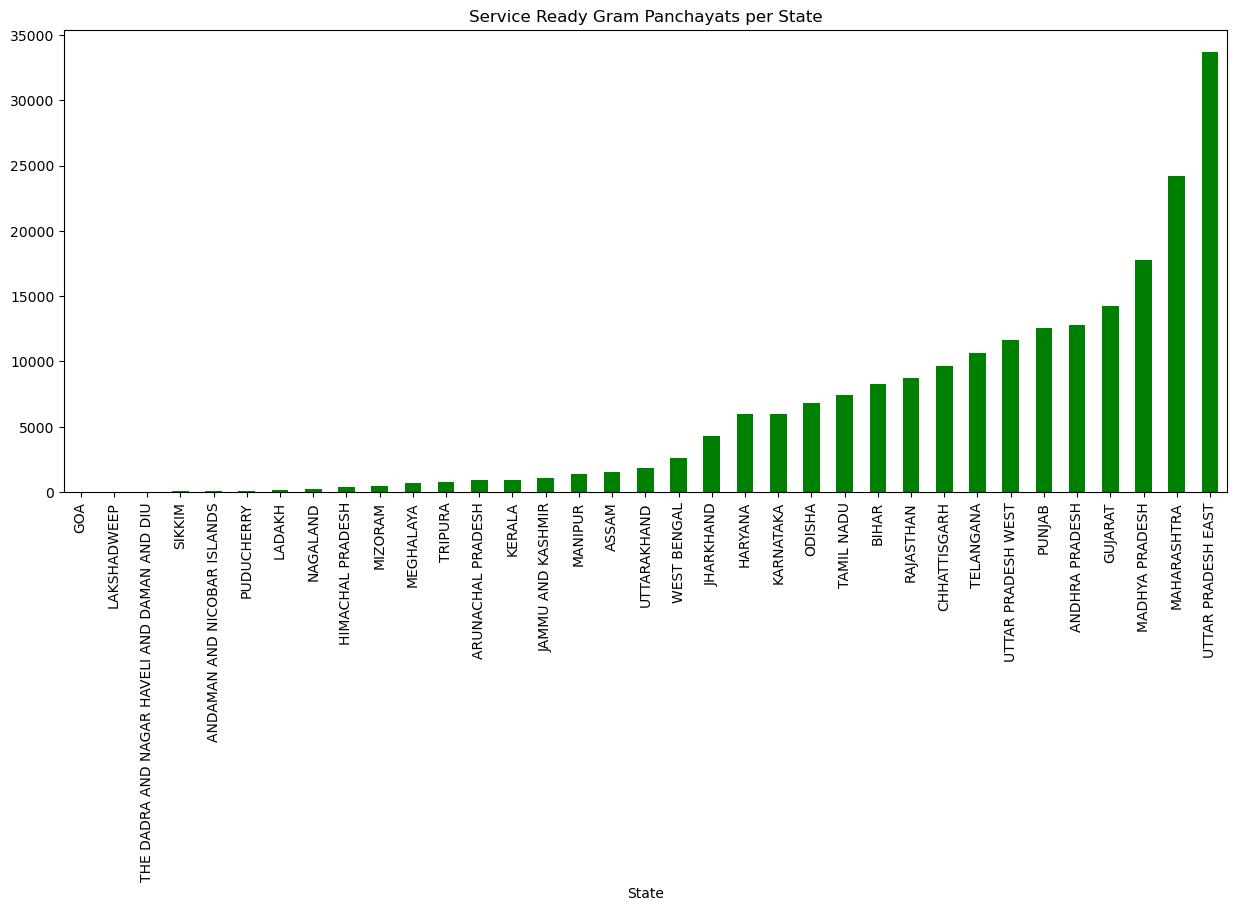

In [61]:
plt.figure(figsize=(12, 6))
df_cleaned.groupby("State")["Service Ready Gram Panchayats"].sum().sort_values().plot(kind='bar', figsize=(15, 6), color='green')
plt.title("Service Ready Gram Panchayats per State")
plt.xticks(rotation=90)
plt.show()

# Pairplot of Panchayats

<Figure size 1200x600 with 0 Axes>

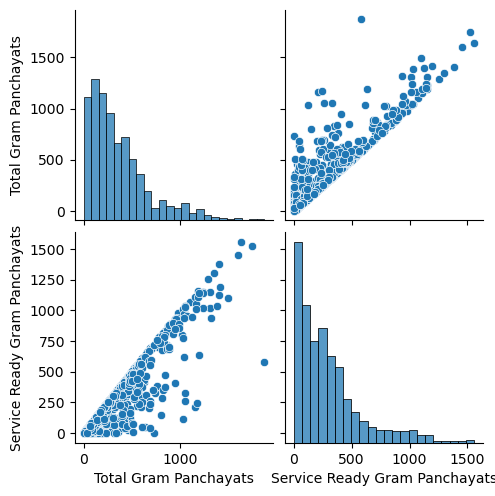

In [63]:
plt.figure(figsize=(12, 6))
sns.pairplot(df_cleaned, vars=["Total Gram Panchayats", "Service Ready Gram Panchayats"])
plt.show()


# Heatmap of Correlations

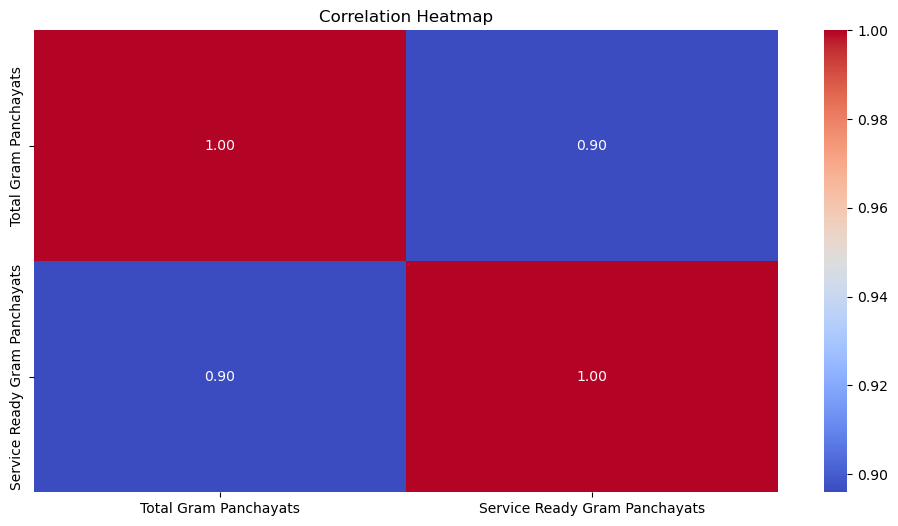

In [65]:
# Selecting only numeric columns for correlation
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Pie Chart of Top 10 States by Service Ready Panchayats

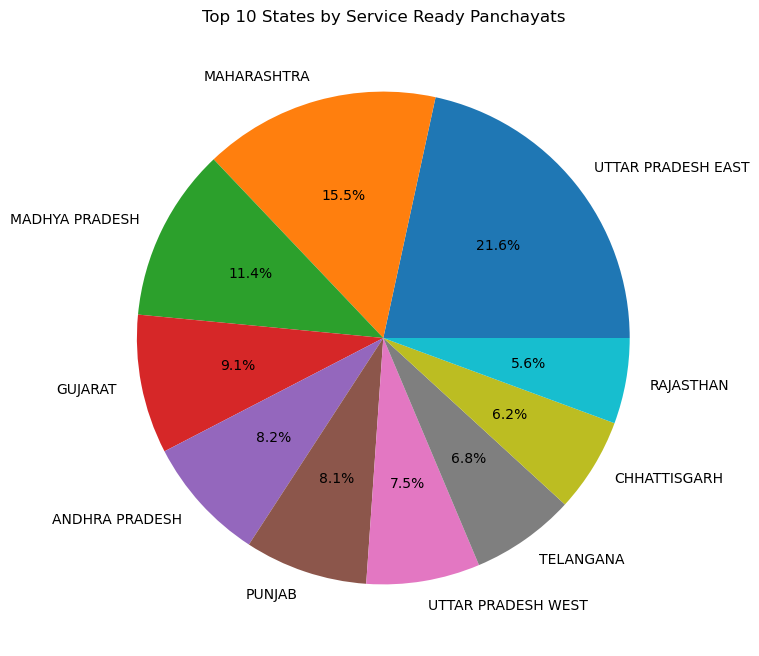

In [67]:
plt.figure(figsize=(8, 8))
df_cleaned.groupby("State")["Service Ready Gram Panchayats"].sum().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 10 States by Service Ready Panchayats")
plt.ylabel("")
plt.show()


# Line Plot: Total Gram Panchayats Over States

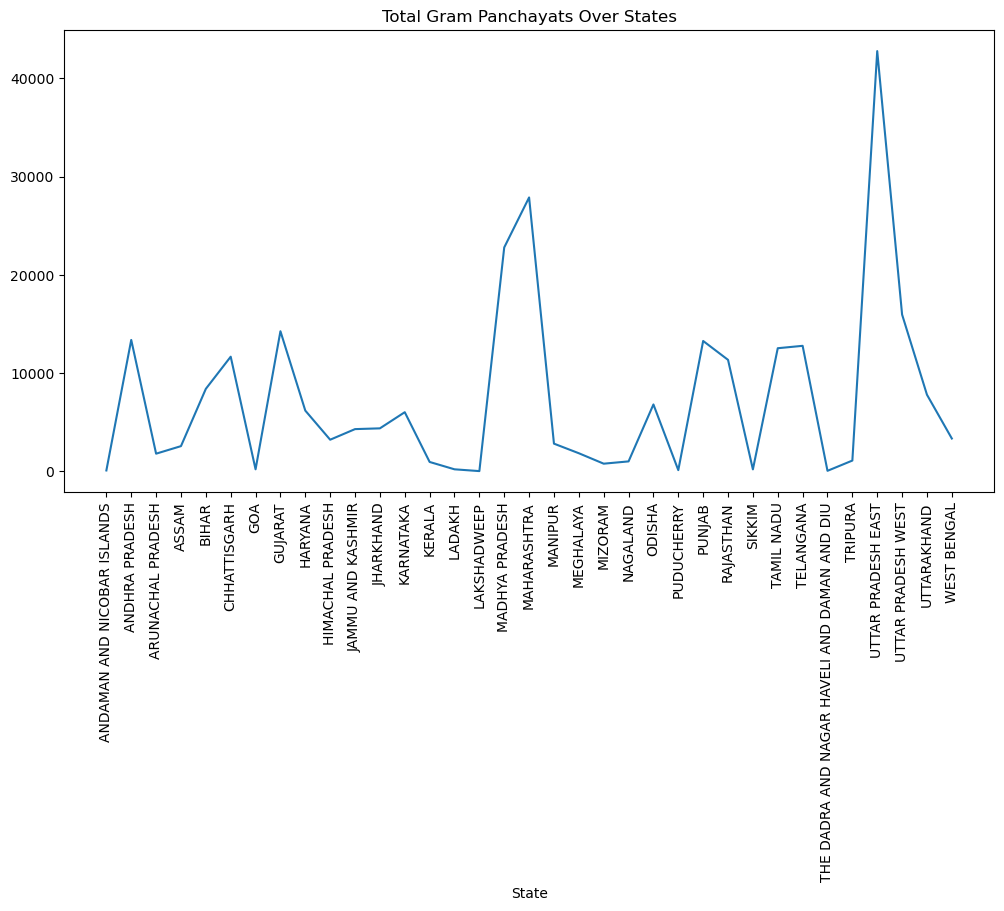

In [69]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.groupby("State")["Total Gram Panchayats"].sum().index, 
             y=df_cleaned.groupby("State")["Total Gram Panchayats"].sum().values)
plt.xticks(rotation=90)
plt.title("Total Gram Panchayats Over States")
plt.show()

# Stacked Bar Chart of Panchayats per State


<Figure size 1200x600 with 0 Axes>

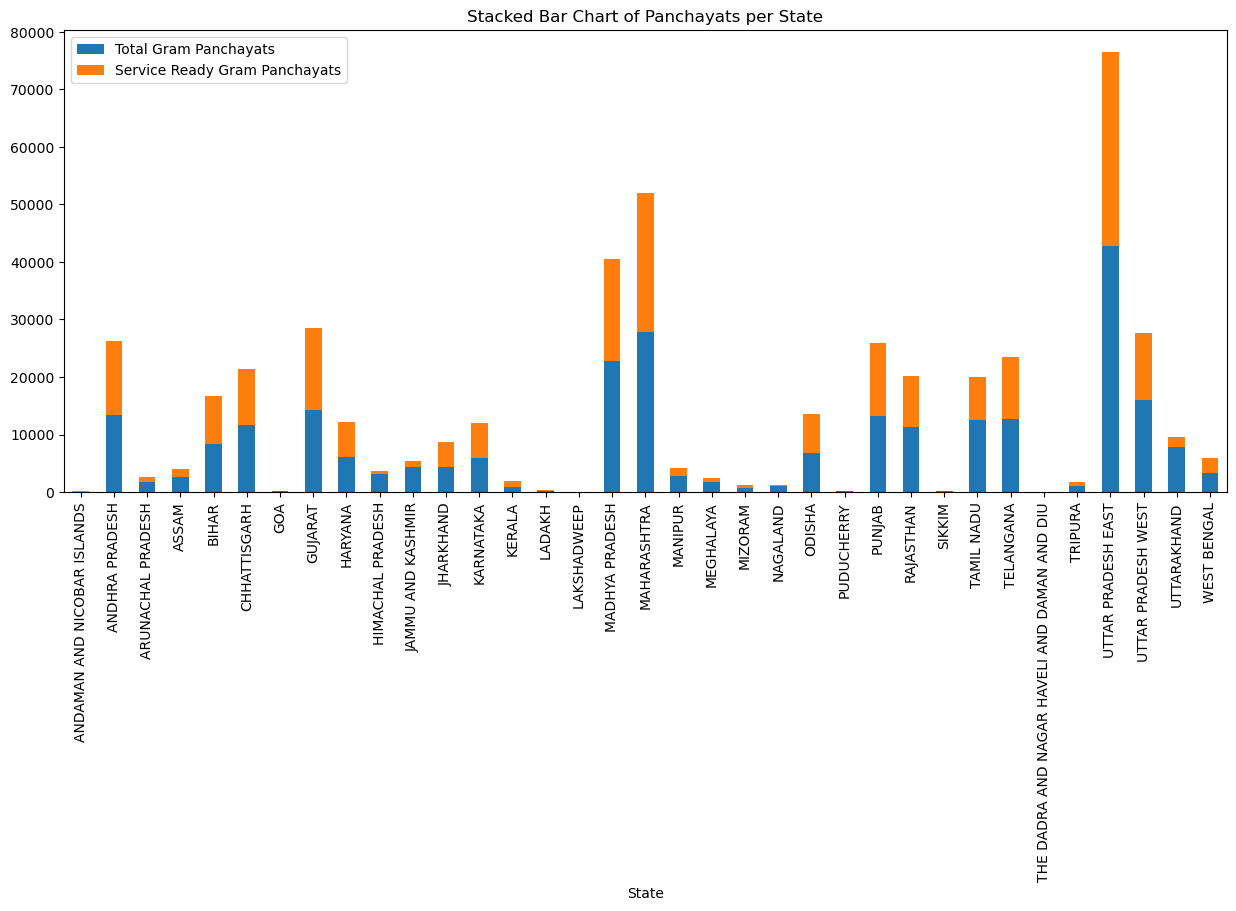

In [71]:
plt.figure(figsize=(12, 6))
df_cleaned.groupby("State")[["Total Gram Panchayats", "Service Ready Gram Panchayats"]].sum().plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title("Stacked Bar Chart of Panchayats per State")
plt.xticks(rotation=90)
plt.show()

# Bar Chart of Top 15 States by Total Gram Panchayats


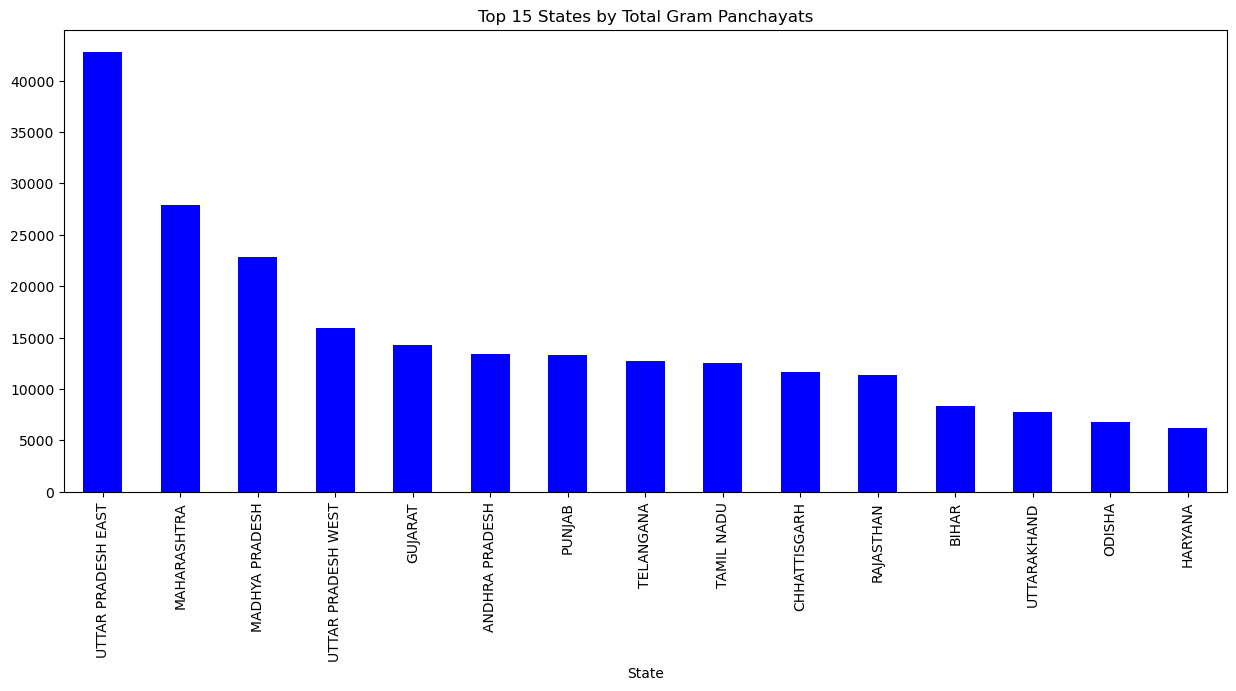

In [73]:
plt.figure(figsize=(12, 6))
df_cleaned.groupby("State")["Total Gram Panchayats"].sum().nlargest(15).plot(kind='bar', figsize=(15, 6), color='blue')
plt.title("Top 15 States by Total Gram Panchayats")
plt.xticks(rotation=90)
plt.show()


# Bar Chart of Top 15 States by Service Ready Gram Panchayats


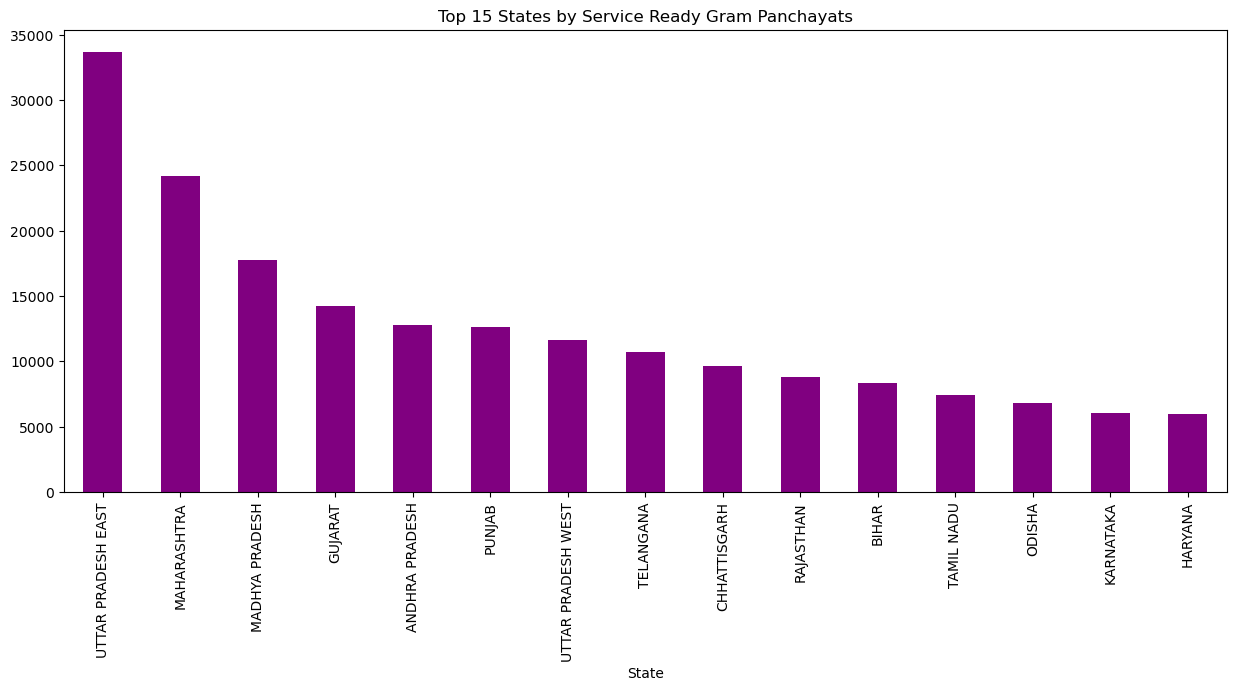

In [75]:
plt.figure(figsize=(12, 6))
df_cleaned.groupby("State")["Service Ready Gram Panchayats"].sum().nlargest(15).plot(kind='bar', figsize=(15, 6), color='purple')
plt.title("Top 15 States by Service Ready Gram Panchayats")
plt.xticks(rotation=90)
plt.show()

In [ ]:
Conclusion:

 1. Data Exploration and Cleaning
-->The dataset contained information on Total Gram Panchayats and Service Ready Gram Panchayats across various states.
-->Data cleaning steps included:
-->Handling missing values by removing incomplete records.
-->Removing duplicates to ensure data integrity.
-->Converting necessary columns to appropriate data types for analysis.

2. Statistical Analysis (T-Test & F-Test)
T-Test Results:
-->A significant difference was found between Total Gram Panchayats and Service Ready Gram Panchayats, indicating uneven broadband deployment.
F-Test Results:
-->The variance between the two groups suggests disparities in broadband implementation across states.

3. Data Visualizations and Insights
Line Plot: Total Gram Panchayats Across States
-->States like Uttar Pradesh, Maharashtra, and Bihar have the highest number of Gram Panchayats.
Stacked Bar Chart: Panchayats per State
-->Some states show higher service-ready Panchayats, while others lag behind, revealing implementation gaps.
Bar Chart: Top 15 States by Total Gram Panchayats
-->Large states have a higher number of rural administrative units, but broadband availability varies.
Bar Chart: Top 15 States by Service Ready Panchayats
-->Some states with fewer Panchayats have a higher service-ready ratio, showing efficient broadband deployment.
Pie Charts & Additional Bar Graphs
-->Percentage distribution of service-ready Panchayats highlights states that need further improvements.

4. Final Observations and Recommendations
-->A clear gap exists between the number of Gram Panchayats and those that are service-ready.
-->Some states require more policy intervention and funding allocation to improve broadband infrastructure.
-->The digital divide is evident, with some regions progressing faster than others.
-->Further predictive modeling can help forecast broadband expansion timelines.
-->Policymakers can use these insights to prioritize states needing accelerated BharatNet implementation.